# Before We Start

## Hal yang perlu diinstall
1. Firefox (atau chrome)
2. Geckodriver (atau chromedriver jika menggunakan chrome)
3. Tesseract
4. Library
   - selenium
   - pytesseract
   - pillow

## Deskripsi
Bot ini hanya untuk pengisian KRS. Jadi dari login sampai membuka halaman KRS harus dilakukan manual.

# Import Packages

In [32]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

import pytesseract
from PIL import Image

In [25]:
import os
os.environ["TESSDATA_PREFIX"] = "tessdata"

# Open Simaster

In [12]:
from selenium import webdriver

# Setting up the webdriver for Firefox
options = webdriver.FirefoxOptions()
options.add_argument('--disable-gpu')
options.add_argument('--start-maximized')

# Creating an instance of Firefox
browser = webdriver.Firefox(options=options, firefox_binary='/usr/bin/firefox', executable_path="/usr/local/bin/geckodriver")

# Navigating to Facebook
browser.get("https://simaster.ugm.ac.id")

# Let the fun begin!

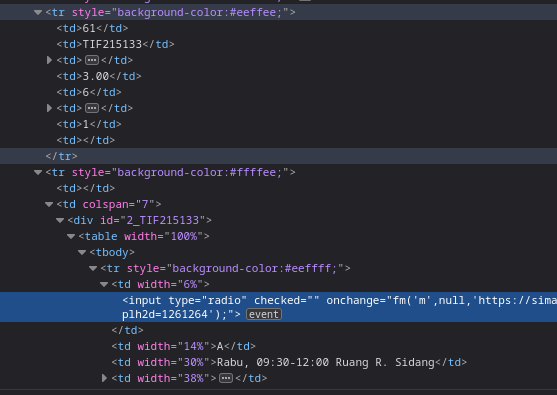

In [33]:
subjects = [
    {
        "code": "TIF213244",
        "class": "A",
        "name": "Integrasi Aplikasi dan Informasi"
    },
    {
        "code": "TIF215216",
        "class": "A",
        "name": "Audit TI dan Tata Kelola Resiko"
    },
    {
        "code": "TIF213241",
        "class": "A",
        "name": "Proyek Senior Teknologi Informasi"
    },
    {
        "code": "TIF213242",
        "class": "A",
        "name": "Proyek Perancangan Teknologi Informasi 1"
    }
]

In [36]:
for subject in subjects:
    try:
        code_element = browser.find_element_by_xpath(f"//td[text()='{subject['code']}']")
        row_header_element = code_element.find_element_by_xpath("..")

        row_input_element = row_header_element.find_element_by_xpath("following-sibling::tr")

        td_class = row_input_element.find_element_by_xpath(f".//td[text()='{subject['class']}']")
        td_input = td_class.find_element_by_xpath("..").find_element_by_xpath(".//input[@type='radio']")
        td_input.send_keys(Keys.SPACE)

        # wait for modal open
        time.sleep(0.8)

        captcha = browser.find_element_by_id('f_captcha').find_element_by_xpath(".//img")
        captcha.screenshot('temp/captcha.png')

        image = Image.open("temp/captcha.png")
        text = pytesseract.image_to_string(image)

        captcha_input = browser.find_element_by_id('f_captcha').find_element_by_name("i_captcha")
        captcha_input.send_keys(text)

        submit = browser.find_element_by_id('f_captcha').find_element_by_class_name("btn-success")
        submit.send_keys(Keys.SPACE)

        print("OK", subject['name'])

        # wait for modal close
        time.sleep(0.5)
    except:
        print("FAIL", subject['name'])

FAIL Integrasi Aplikasi dan Informasi
FAIL Audit TI dan Tata Kelola Resiko
